# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **data loading**

In [2]:
df = pd.read_csv('dataset.csv')
#view the data
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# finding null# 

In [3]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

# finding duplicates

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

# statistical summary

In [6]:
from pandas.io.formats.format import set_option
set_option('display.precision',2)
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,...,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4424.00,4.42e+03
mean,1.18,6.89,1.73,9.90,0.89,2.53,1.25,12.32,16.46,7.32,...,0.14,0.54,6.23,8.06,4.44,10.23,0.15,11.57,1.23,1.97e-03
std,0.61,5.30,1.31,4.33,0.31,3.96,1.75,9.03,11.04,4.00,...,0.69,1.92,2.20,3.95,3.01,5.21,0.75,2.66,1.38,2.27e+00
min,1.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.60,-0.80,-4.06e+00
25%,1.00,1.00,1.00,6.00,1.00,1.00,1.00,2.00,3.00,5.00,...,0.00,0.00,5.00,6.00,2.00,10.75,0.00,9.40,0.30,-1.70e+00
50%,1.00,8.00,1.00,10.00,1.00,1.00,1.00,13.00,14.00,6.00,...,0.00,0.00,6.00,8.00,5.00,12.20,0.00,11.10,1.40,3.20e-01
75%,1.00,12.00,2.00,13.00,1.00,1.00,1.00,22.00,27.00,10.00,...,0.00,0.00,7.00,10.00,6.00,13.33,0.00,13.90,2.60,1.79e+00
max,6.00,18.00,9.00,17.00,1.00,17.00,21.00,29.00,34.00,32.00,...,12.00,19.00,23.00,33.00,20.00,18.57,12.00,16.20,3.70,3.51e+00


In [7]:
# # finding correlations between attributes
# # Computing the correlation matrix
# corr = df.corr(numeric_only=True)

# # Setting up the matplotlib figure
# fig, ax = plt.subplots(figsize=(50, 45))

# # Drawing the heatmap
# sns.heatmap(corr, cmap='coolwarm', annot=True, square=True)

# plt.title("Correlation Heatmap between Features")
# plt.show()


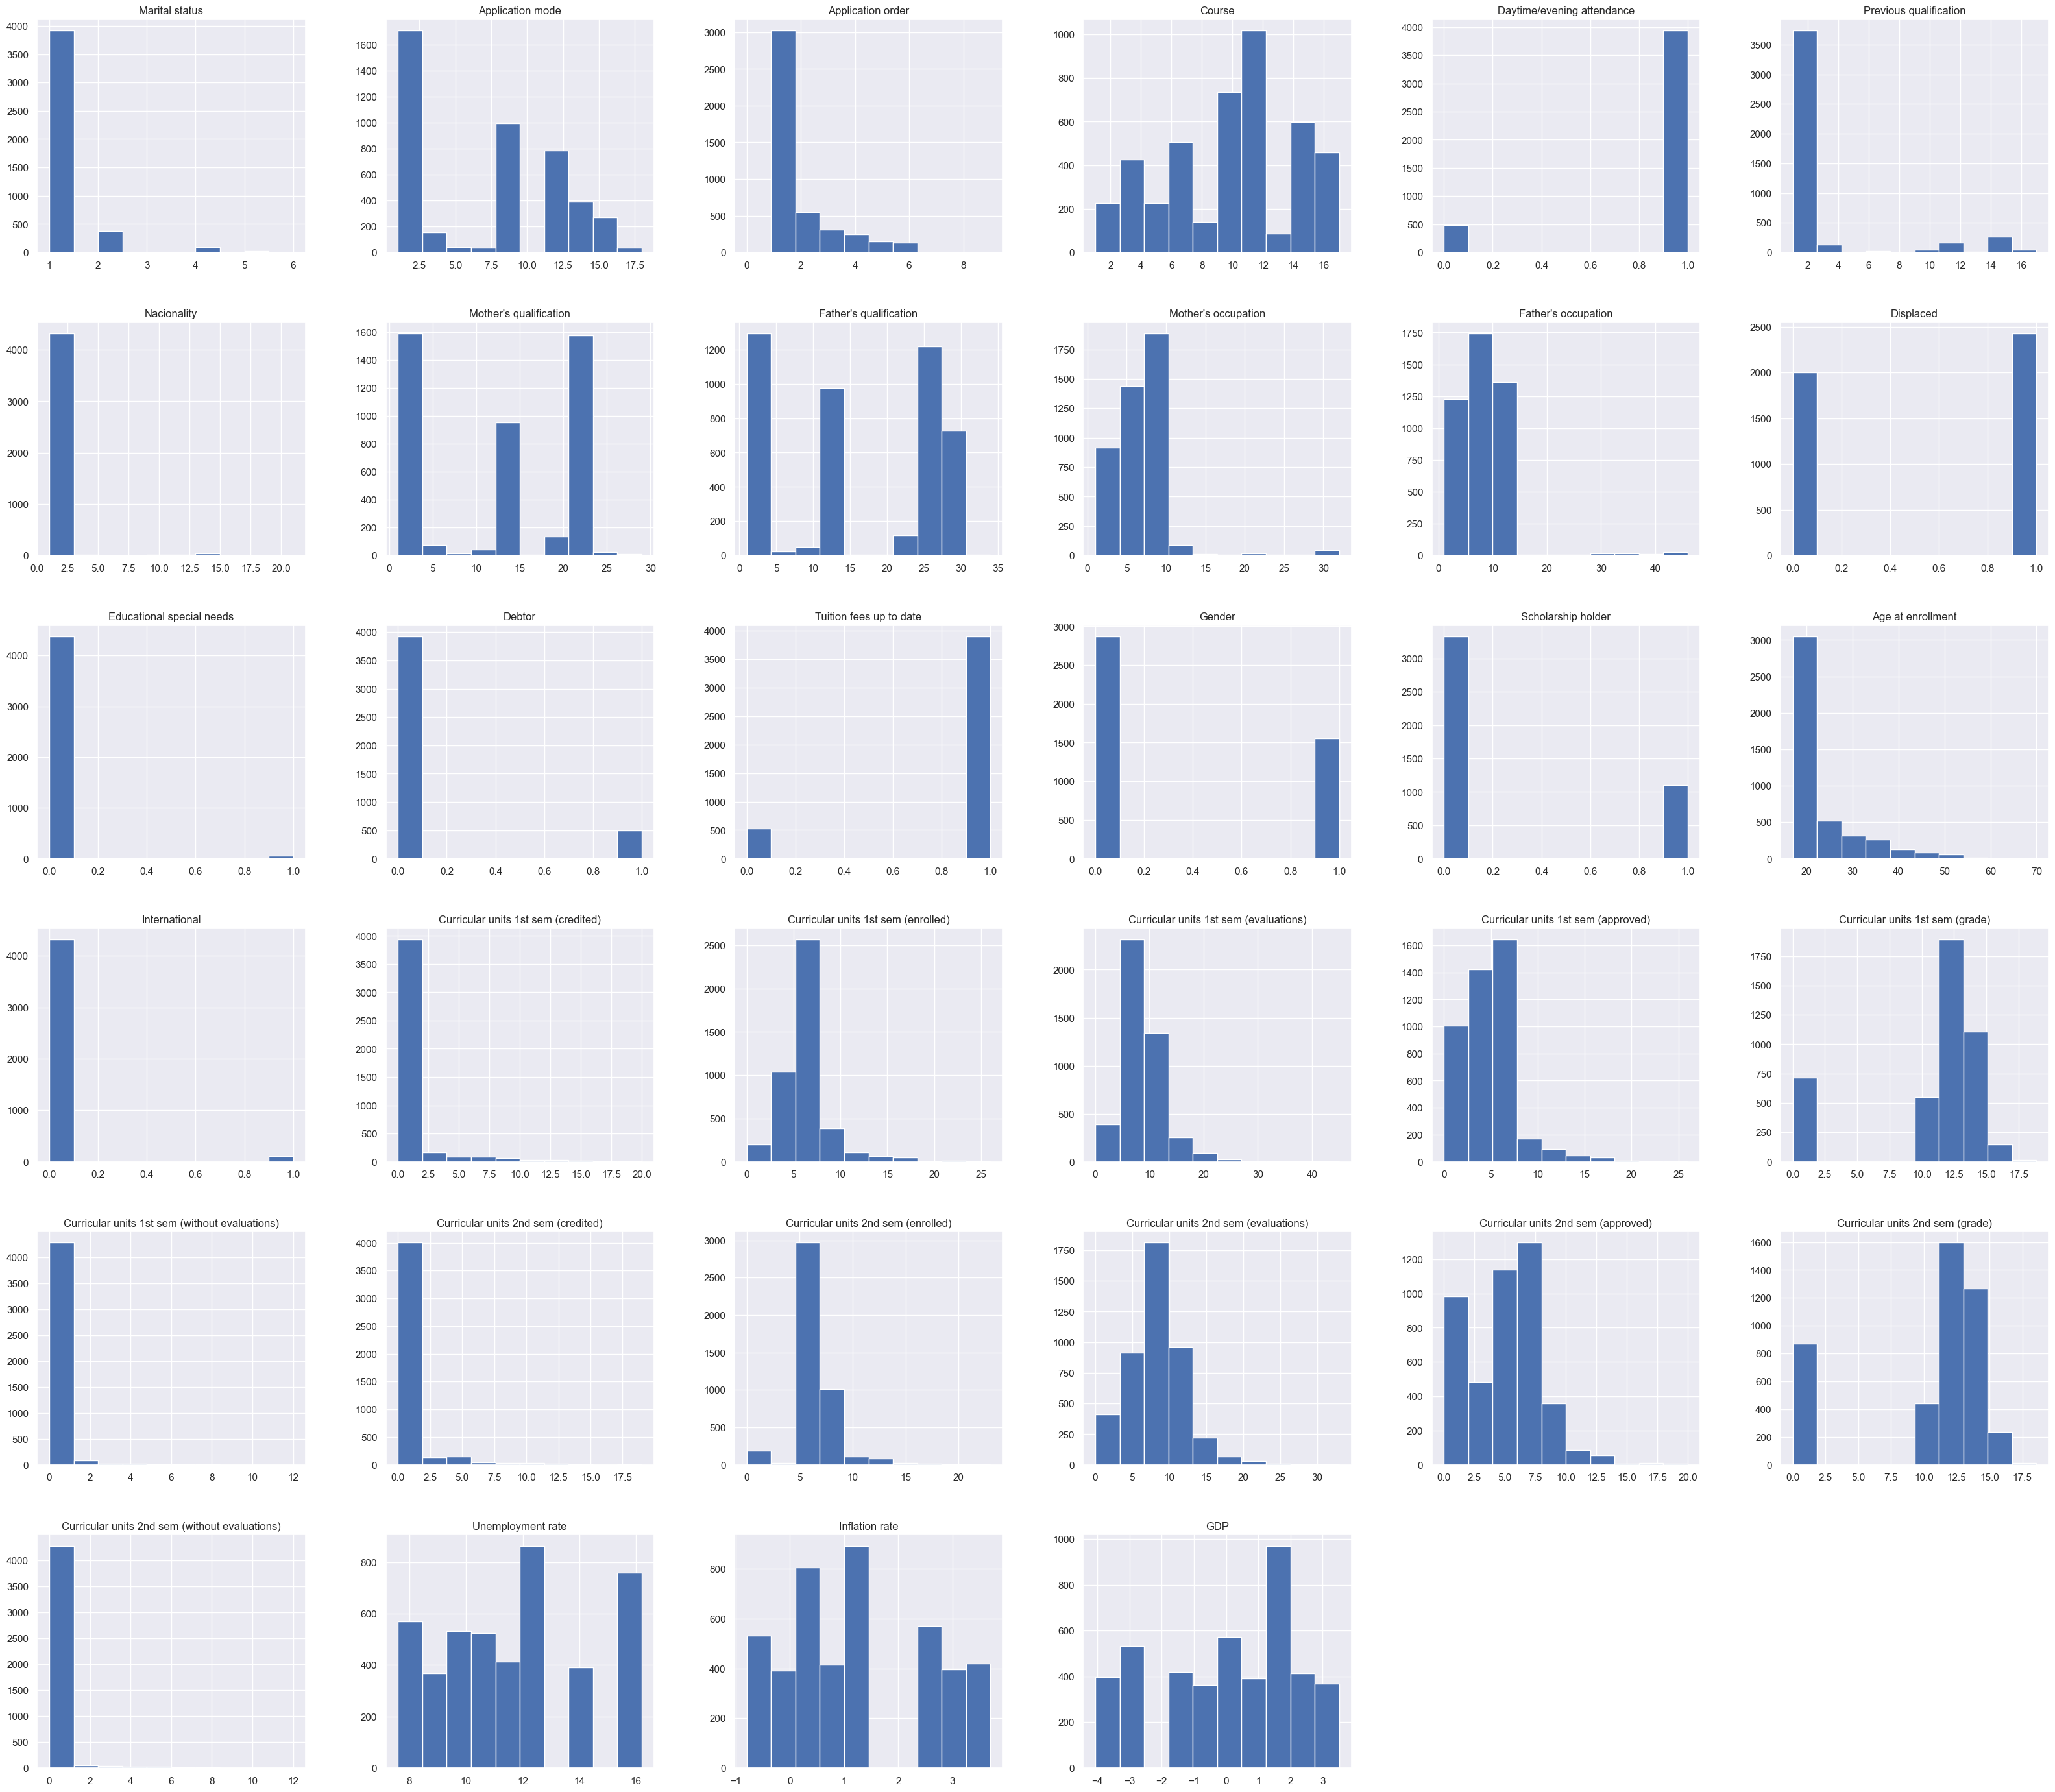

In [8]:

##histogram - visual representation
sns.set_theme(style = 'darkgrid')
df.hist(bins=10, figsize=(40, 35), grid=True, legend=None);

In [9]:

df.describe(include='all').loc['unique', :]
     

Marital status                                    NaN
Application mode                                  NaN
Application order                                 NaN
Course                                            NaN
Daytime/evening attendance                        NaN
Previous qualification                            NaN
Nacionality                                       NaN
Mother's qualification                            NaN
Father's qualification                            NaN
Mother's occupation                               NaN
Father's occupation                               NaN
Displaced                                         NaN
Educational special needs                         NaN
Debtor                                            NaN
Tuition fees up to date                           NaN
Gender                                            NaN
Scholarship holder                                NaN
Age at enrollment                                 NaN
International               

# Genderwise no of students counting

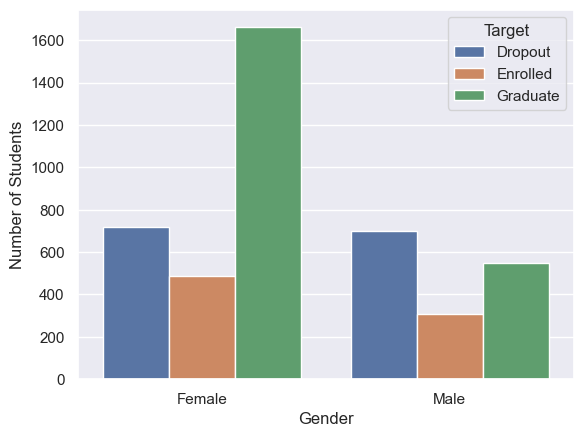

In [10]:
sns.countplot(data=df, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])
plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

In [11]:
s_df=df.copy()
s_df.shape

(4424, 35)

In [12]:
df.loc[:,'Marital status'].value_counts()

Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64

In [13]:
df.loc[:,'Application mode'].value_counts()

Application mode
1     1708
8      872
12     785
14     312
15     213
4      139
9      124
13      77
16      59
7       38
17      35
6       30
3       16
5       10
2        3
18       1
10       1
11       1
Name: count, dtype: int64

In [14]:

df.loc[:,'Application order'].value_counts()

Application order
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
0       1
Name: count, dtype: int64

In [15]:
df.loc[:,'Course'].value_counts()

Course
12    766
9     380
10    355
6     337
15    331
14    268
17    268
11    252
5     226
2     215
3     215
4     210
16    192
7     170
8     141
13     86
1      12
Name: count, dtype: int64

In [16]:
df.loc[:,'Daytime/evening attendance'].value_counts()

Daytime/evening attendance
1    3941
0     483
Name: count, dtype: int64

In [17]:
df.loc[:,'Previous qualification'].value_counts()

Previous qualification
1     3717
14     219
12     162
3      126
9       45
15      40
16      36
2       23
6       16
7       11
4        8
13       7
17       6
8        4
11       2
5        1
10       1
Name: count, dtype: int64

In [18]:
df.loc[:,'Nacionality'].value_counts()

Nacionality
1     4314
14      38
12      14
3       13
9       13
10       5
16       3
4        3
18       3
15       2
8        2
17       2
11       2
2        2
19       2
13       1
5        1
21       1
20       1
6        1
7        1
Name: count, dtype: int64

In [19]:
df.loc[:,"Mother's qualification"].value_counts()

Mother's qualification
1     1069
22    1009
13     953
23     562
3      438
19     130
2       83
4       49
10      42
5       21
25       9
7        8
24       8
26       6
27       4
6        4
28       4
18       3
20       3
21       3
9        3
17       3
8        3
11       2
12       1
14       1
16       1
15       1
29       1
Name: count, dtype: int64

In [20]:
df.loc[:,"Father's qualification"].value_counts()

Father's qualification
27    1209
14     968
1      904
28     702
3      282
24     112
2       68
4       39
10      38
29      20
5       18
9       10
26       8
7        5
30       5
12       4
21       4
16       4
20       3
18       2
33       2
31       2
8        2
6        2
25       2
15       1
32       1
13       1
11       1
17       1
34       1
23       1
19       1
22       1
Name: count, dtype: int64

In [21]:

df.loc[:,'Curricular units 1st sem (credited)'].value_counts()

Curricular units 1st sem (credited)
0     3847
2       94
1       85
3       69
6       51
4       47
7       41
5       41
8       31
9       27
11      17
14      15
10      15
13      13
12      12
15       5
18       4
16       3
17       3
19       2
20       2
Name: count, dtype: int64

In [22]:
df.loc[:,'Curricular units 1st sem (enrolled)'].value_counts()
     

Curricular units 1st sem (enrolled)
6     1910
5     1010
7      656
8      296
0      180
12      66
10      52
11      45
9       36
15      25
14      22
4       21
13      20
18      19
17      16
16      13
3       10
2        9
1        7
21       6
19       2
23       2
26       1
Name: count, dtype: int64

In [23]:

df.loc[:,'Curricular units 1st sem (evaluations)'].value_counts()

Curricular units 1st sem (evaluations)
8     791
7     703
6     598
9     402
0     349
10    340
11    239
12    223
5     220
13    140
14    105
15     70
16     47
17     33
18     30
19     23
4      19
21     17
20     12
22     10
23      9
2       8
1       6
3       6
24      6
26      4
25      3
29      2
45      2
27      2
32      1
36      1
31      1
28      1
33      1
Name: count, dtype: int64

In [24]:
df.loc[:,'Curricular units 1st sem (approved)'].value_counts()
     

Curricular units 1st sem (approved)
6     1171
5      723
0      718
7      471
4      433
3      269
2      160
1      127
8      108
11      49
12      44
9       40
13      26
10      24
18      15
14      14
17      10
15       7
16       5
21       4
20       3
19       2
26       1
Name: count, dtype: int64

In [25]:
df.loc[:,'Curricular units 1st sem (grade)'].value_counts()

Curricular units 1st sem (grade)
0.00     718
12.00    205
13.00    147
11.00    138
11.50     89
        ... 
15.43      1
15.11      1
15.80      1
13.78      1
14.15      1
Name: count, Length: 805, dtype: int64

In [26]:

df.loc[:,'Curricular units 1st sem (without evaluations)'].value_counts()

Curricular units 1st sem (without evaluations)
0     4130
1      153
2       79
3       23
4       15
6        6
7        6
5        5
8        4
12       2
10       1
Name: count, dtype: int64

In [27]:
df.loc[:,'Curricular units 2nd sem (credited)'].value_counts()


Curricular units 2nd sem (credited)
0     3894
1      107
2       92
4       78
5       68
3       49
6       26
11      20
7       16
9       15
12      14
10      13
8       12
13       9
14       4
15       2
16       2
18       2
19       1
Name: count, dtype: int64

In [28]:
df.loc[:,'Curricular units 2nd sem (enrolled)'].value_counts()


Curricular units 2nd sem (enrolled)
6     1913
5     1054
8      661
7      304
0      180
11      60
9       50
10      48
12      44
13      37
14      22
4       17
17      12
2        5
3        3
19       3
1        3
15       2
23       2
18       2
16       1
21       1
Name: count, dtype: int64

In [29]:
df.loc[:,'Curricular units 2nd sem (evaluations)'].value_counts()


Curricular units 2nd sem (evaluations)
8     792
6     614
7     563
9     456
0     401
10    355
5     288
11    255
12    226
13    126
14     98
15     73
16     49
17     25
18     22
19     19
21     10
4      10
22     10
20      8
23      4
2       4
26      3
1       3
24      3
3       2
27      2
28      1
25      1
33      1
Name: count, dtype: int64

In [30]:
df.loc[:,'Curricular units 2nd sem (approved)'].value_counts()


Curricular units 2nd sem (approved)
6     965
0     870
5     726
4     414
7     331
8     321
3     285
2     198
1     114
11     48
10     38
9      36
12     34
13     21
17      8
14      6
19      3
20      2
16      2
18      2
Name: count, dtype: int64

In [31]:
df.loc[:,'Curricular units 2nd sem (grade)'].value_counts()


Curricular units 2nd sem (grade)
0.00     870
12.00    170
11.00    165
13.00    150
11.50     86
        ... 
13.51      1
14.51      1
12.05      1
13.24      1
13.42      1
Name: count, Length: 786, dtype: int64

In [32]:
df.loc[:,'Curricular units 2nd sem (without evaluations)'].value_counts()


Curricular units 2nd sem (without evaluations)
0     4142
1      140
2       48
3       35
4       21
5       17
6        8
8        6
7        5
12       2
Name: count, dtype: int64

In [33]:
df.loc[:,'Unemployment rate'].value_counts()


Unemployment rate
7.6     571
9.4     533
10.8    525
12.4    445
12.7    419
11.1    414
15.5    397
13.9    390
8.9     368
16.2    362
Name: count, dtype: int64

In [34]:
df.loc[:,'Inflation rate'].value_counts()


Inflation rate
 1.4    893
 2.6    571
-0.8    533
 0.5    445
 3.7    419
 0.6    414
 2.8    397
-0.3    390
 0.3    362
Name: count, dtype: int64

In [35]:
df.loc[:,'GDP'].value_counts()


GDP
 0.32    571
-3.12    533
 1.74    525
 1.79    445
-1.70    419
 2.02    414
-4.06    397
 0.79    390
 3.51    368
-0.92    362
Name: count, dtype: int64

# labelencoding
0- Dropout
1- Enrolled
2- Graduated

In [36]:
s_df['Target'] = LabelEncoder().fit_transform(s_df['Target'])
s_df.loc[:,'Target'].value_counts()


Target
2    2209
0    1421
1     794
Name: count, dtype: int64

# identifying outliers

In [37]:
# Calculating the Z-score for each data point
z_scores = np.abs(stats.zscore(s_df))

# Finding data points with a Z-score greater than 3
outliers = np.where(z_scores > 3)

# Printing the indices of the outliers
outliers

(array([   5,    5,    8, ..., 4420, 4423, 4423], shape=(1641,)),
 array([17, 30,  6, ..., 18,  6, 18], shape=(1641,)))

In [38]:
# Dropping the corresponding rows from the dataframe
out_df = s_df.drop(s_df.index[outliers[0]])

# Resetting the index of the dataframe
s_df = out_df.reset_index(drop=True)
s_df.shape
s_df


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.00,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.67,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.00,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.40,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.00,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,1,1,1,8,1,1,1,3,28,4,...,0,5,8,5,11.60,0,9.4,-0.8,-3.12,2
3533,1,1,1,5,1,1,1,1,1,10,...,0,6,6,6,13.50,0,16.2,0.3,-0.92,2
3534,1,15,1,5,1,14,1,3,28,4,...,5,9,10,7,13.14,1,16.2,0.3,-0.92,2
3535,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.50,0,13.9,-0.3,0.79,0


In [39]:
# Changing the Target to numerical Value 0 or 1. 
#We are predicting if a Student is gonna Dropout or Graduate, ignoring the ones who are Enrolled.
s_df.drop(s_df[s_df["Target"]==1].index, inplace=True)
s_df.loc[:,'Target'].value_counts()

Target
2    1791
0    1116
Name: count, dtype: int64

In [40]:

# mapping integer codes to new values
mapping = {0: 1, 2: 0}
s_df["Target"] = s_df["Target"].replace(mapping)

s_df.loc[:,'Target'].value_counts()

Target
0    1791
1    1116
Name: count, dtype: int64

In [41]:

x = s_df.drop(columns=['Target'], axis=1)
z = s_df["Target"]

In [42]:
s_df.shape

(2907, 35)

# Standardization

In [43]:
scaler = StandardScaler()
scaled = scaler.fit_transform(x)


# Split data into training and testing sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(scaled, z, test_size=0.2, random_state=10)


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


In [50]:
# 5 classifiers: kNN, Logistic Regression, SVM, Naive Bayes, MLP
models = {
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=10),
    'GaussianNB': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=10),                 # no probability=True, faster
    'MLP': MLPClassifier(max_iter=500, random_state=10)
}

# Reasonable, small hyperparameter grids
param_grids = {
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'class_weight': [None, 'balanced']
    },
    'GaussianNB': {
        'var_smoothing': [1e-9, 1e-7, 1e-5]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'MLP': {
        'hidden_layer_sizes': [(50,), (100,)],
        'alpha': [0.0001, 0.001]
    }
}


In [53]:
from sklearn.metrics import accuracy_score, f1_score

scoring = {
    'roc_auc': 'roc_auc',   # uses scores / probabilities internally
    'f1': 'f1',
    'accuracy': 'accuracy'
}

gridsearches = {}
variance_results = {metric: {} for metric in scoring.keys()}
best_scores = {metric: {} for metric in scoring.keys()}

for name, model in models.items():
    print(f"\nRunning GridSearchCV for: {name}")
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring=scoring,
        refit='roc_auc',   # refit using best ROC AUC
        cv=3,              # 3-fold to keep it fast
        n_jobs=-1,
        verbose=1
    )
    gs.fit(X_train, y_train)
    gridsearches[name] = gs

    # Variance of mean CV scores across all hyperparameter combinations
    for metric in scoring.keys():
        scores = gs.cv_results_[f'mean_test_{metric}']
        variance_results[metric][name] = np.var(scores)
        best_scores[metric][name] = scores.max()
        
import pandas as pd

rows = []
for metric in scoring.keys():
    for name in models.keys():
        rows.append({
            'model': name,
            'metric': metric,
            'variance': variance_results[metric][name]
        })

var_df = pd.DataFrame(rows)
display(var_df.pivot(index='model', columns='metric', values='variance'))



Running GridSearchCV for: LogisticRegression
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Running GridSearchCV for: GaussianNB
Fitting 3 folds for each of 3 candidates, totalling 9 fits

Running GridSearchCV for: KNN
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Running GridSearchCV for: SVM
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Running GridSearchCV for: MLP
Fitting 3 folds for each of 4 candidates, totalling 12 fits


metric,accuracy,f1,roc_auc
model,,,
GaussianNB,0.00e+00,0.00e+00,2.65e-09
KNN,5.47e-06,1.39e-05,1.09e-04
LogisticRegression,8.98e-06,3.97e-06,8.09e-08
MLP,6.42e-06,1.12e-05,1.06e-06
SVM,1.39e-04,2.66e-04,2.18e-05


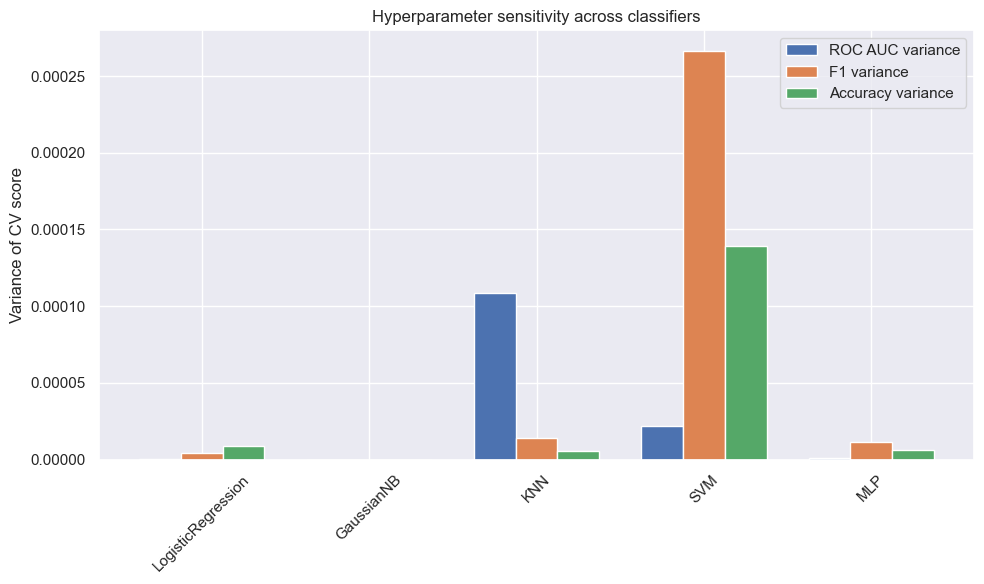

In [54]:
import matplotlib.pyplot as plt
import numpy as np

model_names = list(models.keys())
x = np.arange(len(model_names))
width = 0.25

roc_vars = [variance_results['roc_auc'][m] for m in model_names]
f1_vars = [variance_results['f1'][m] for m in model_names]
acc_vars = [variance_results['accuracy'][m] for m in model_names]

plt.figure(figsize=(10, 6))

plt.bar(x - width, roc_vars, width, label='ROC AUC variance')
plt.bar(x,         f1_vars, width, label='F1 variance')
plt.bar(x + width, acc_vars, width, label='Accuracy variance')

plt.xticks(x, model_names, rotation=45)
plt.ylabel('Variance of CV score')
plt.title('Hyperparameter sensitivity across classifiers')
plt.legend()
plt.tight_layout()
plt.show()


Gaussian Naive Bayes shows near-zero variance across all metrics, indicating very high robustness to hyperparameter changes.

Logistic Regression remains highly stable, suggesting the student dropout data is largely linearly separable.

kNN and MLP exhibit low but non-zero sensitivity, showing moderate dependence on hyperparameter tuning.

SVM demonstrates the highest sensitivity, especially for F1-score, requiring careful hyperparameter selection.

Overall, F1-score is more sensitive than accuracy and ROC AUC, highlighting the impact of hyperparameters on dropout classification quality.